# Visualize apatite and kaolinite in Paleoproterozoic shales

In [27]:
# Inline matplotlib figures
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec

## Load data.

Francevillian XRD data.

In [28]:
fd_data = pd.read_csv('input_data/franceville_xrd.csv')
fd_data = fd_data.set_index('Sample No')
fd_data.rename({'depth, m': 'Depth, m'}, axis='columns', inplace=True)
fd_data.head()

,"Depth, m",Quartz,K-feldspar,Plagioclase,Chlorite,K-mica,Kaolinite,Calcite,Dolomite,Siderite,Pyrite,Apatite,Gypsum,Pyrrothite,Unnamed: 15,Dol i,Dol ii,Doli/Dolii,Phyllosilicate,Feldspar
Sample No,,,,,,,,,,,,,,,,,,,,
LST12-1,17.200,42.4,5.3,26.9,9.1,9.3,6.3,NaN,0.5,NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.7,32.2
LST12-BS-1,24.575,48.3,1.6,10.2,NaN,23.0,3.7,NaN,0.3,0.2,12.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.7,11.8
LST12-BS-2,25.145,51.7,1.8,4.4,NaN,32.8,3.1,NaN,1.9,3.6,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.9,6.2
LST12-2,25.900,48.0,3.1,2.6,NaN,37.9,3.0,0.2,1.5,3.3,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.9,5.7
LST12-BS-3,26.465,57.0,4.8,4.7,NaN,26.8,4.0,NaN,1.1,0.8,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.8,9.5


Onega XRD data

In [29]:
oph_data = pd.read_excel('input_data/onega_xrd.xlsx')
oph_data = oph_data.set_index('Sample No')
oph_data.head()

,Description,"Depth, m",Quartz,K-feldspar,Plagioclase,Mica,Chlorite,Kaolinite,Talc,Hematite,...,Siderite,Apatite,Titanite,Rutile,Anatase,Graphite,Mica 2M,Dolomite.1,Fe-dolomite,Unnamed: 24
Sample No,,,,,,,,,,,,,,,,,,,,,
1362-4,NaN,1080.24,NaN,NaN,NaN,0.9,NaN,1.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,36.7,NaN
1362-10,NaN,1080.30,NaN,NaN,NaN,0.5,NaN,1.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,33.2,NaN
1362-18,NaN,1080.38,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.3,NaN
1362-21,NaN,1080.41,0.1,NaN,NaN,NaN,NaN,0.4,0.7,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,NaN
1363-4,NaN,1080.43,NaN,0.3,NaN,NaN,NaN,0.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.4,NaN


## Plot lithostratigraphy

In [30]:
def fill_apfig(data, columns, axlist, imfile, top, bottom, unit='wt.%', ycol='Depth, m', lithoex=10, lims=None):
    """
    Fill figure columns with data.
    """
    
    # paint lithology column
    img = mpimg.imread(imfile)
    axlist[0].imshow(img, aspect='auto', extent=(0, lithoex, bottom, top))
    
    # scatter data
    for col, ax in zip(columns, axlist[1:]):
        ax.scatter(y = 'Depth, m',
                   x = col,
                   data = data,
                   marker = 'o',
                   color = 'C0',
                   edgecolor = 'black',
                  )
    
    # constrict x axes
    if lims:
        for ax in axlist[1:]:
            ax.set_xlim(left=lims[0], right=lims[1])

    # format axes
    for ax in axlist:
        ax.set_ylim(top=top, bottom=bottom) # Constrict y axis and flip it.
        ax.xaxis.tick_top()                # Put x ticks on top of plot.
        ax.xaxis.set_label_position('top') # Put x labels on top of plot.
        ax.yaxis.get_major_locator().set_params(nbins=20) # Increase amount of y ticks shown

    for ax in axlist[1:]:
        ax.set_xscale('log')                                # make into log scales
        ax.xaxis.get_major_locator().set_params(numticks=5) # Increase amount of major ticks shown
        ax.xaxis.get_minor_locator().set_params(numticks=9) # Add minor ticks
        ax.xaxis.set_tick_params(rotation=45)
        ax.yaxis.set_tick_params(labelleft=False)
    
    # label columns
    axlist[0].set_xlabel('Lithology')
    axlist[0].set_ylabel('Depth (m)')
    axlist[1].set_xlabel(f'{columns[0]} ({unit})')
    axlist[2].set_xlabel(f'{columns[1]} ({unit})')

    # format litho column
    axlist[0].set_xticks([])
    for spine in ['top', 'right', 'bottom']:
        axlist[0].spines[spine].set_visible(False)
    axlist[0].spines['left'].set_position(('outward', 12))

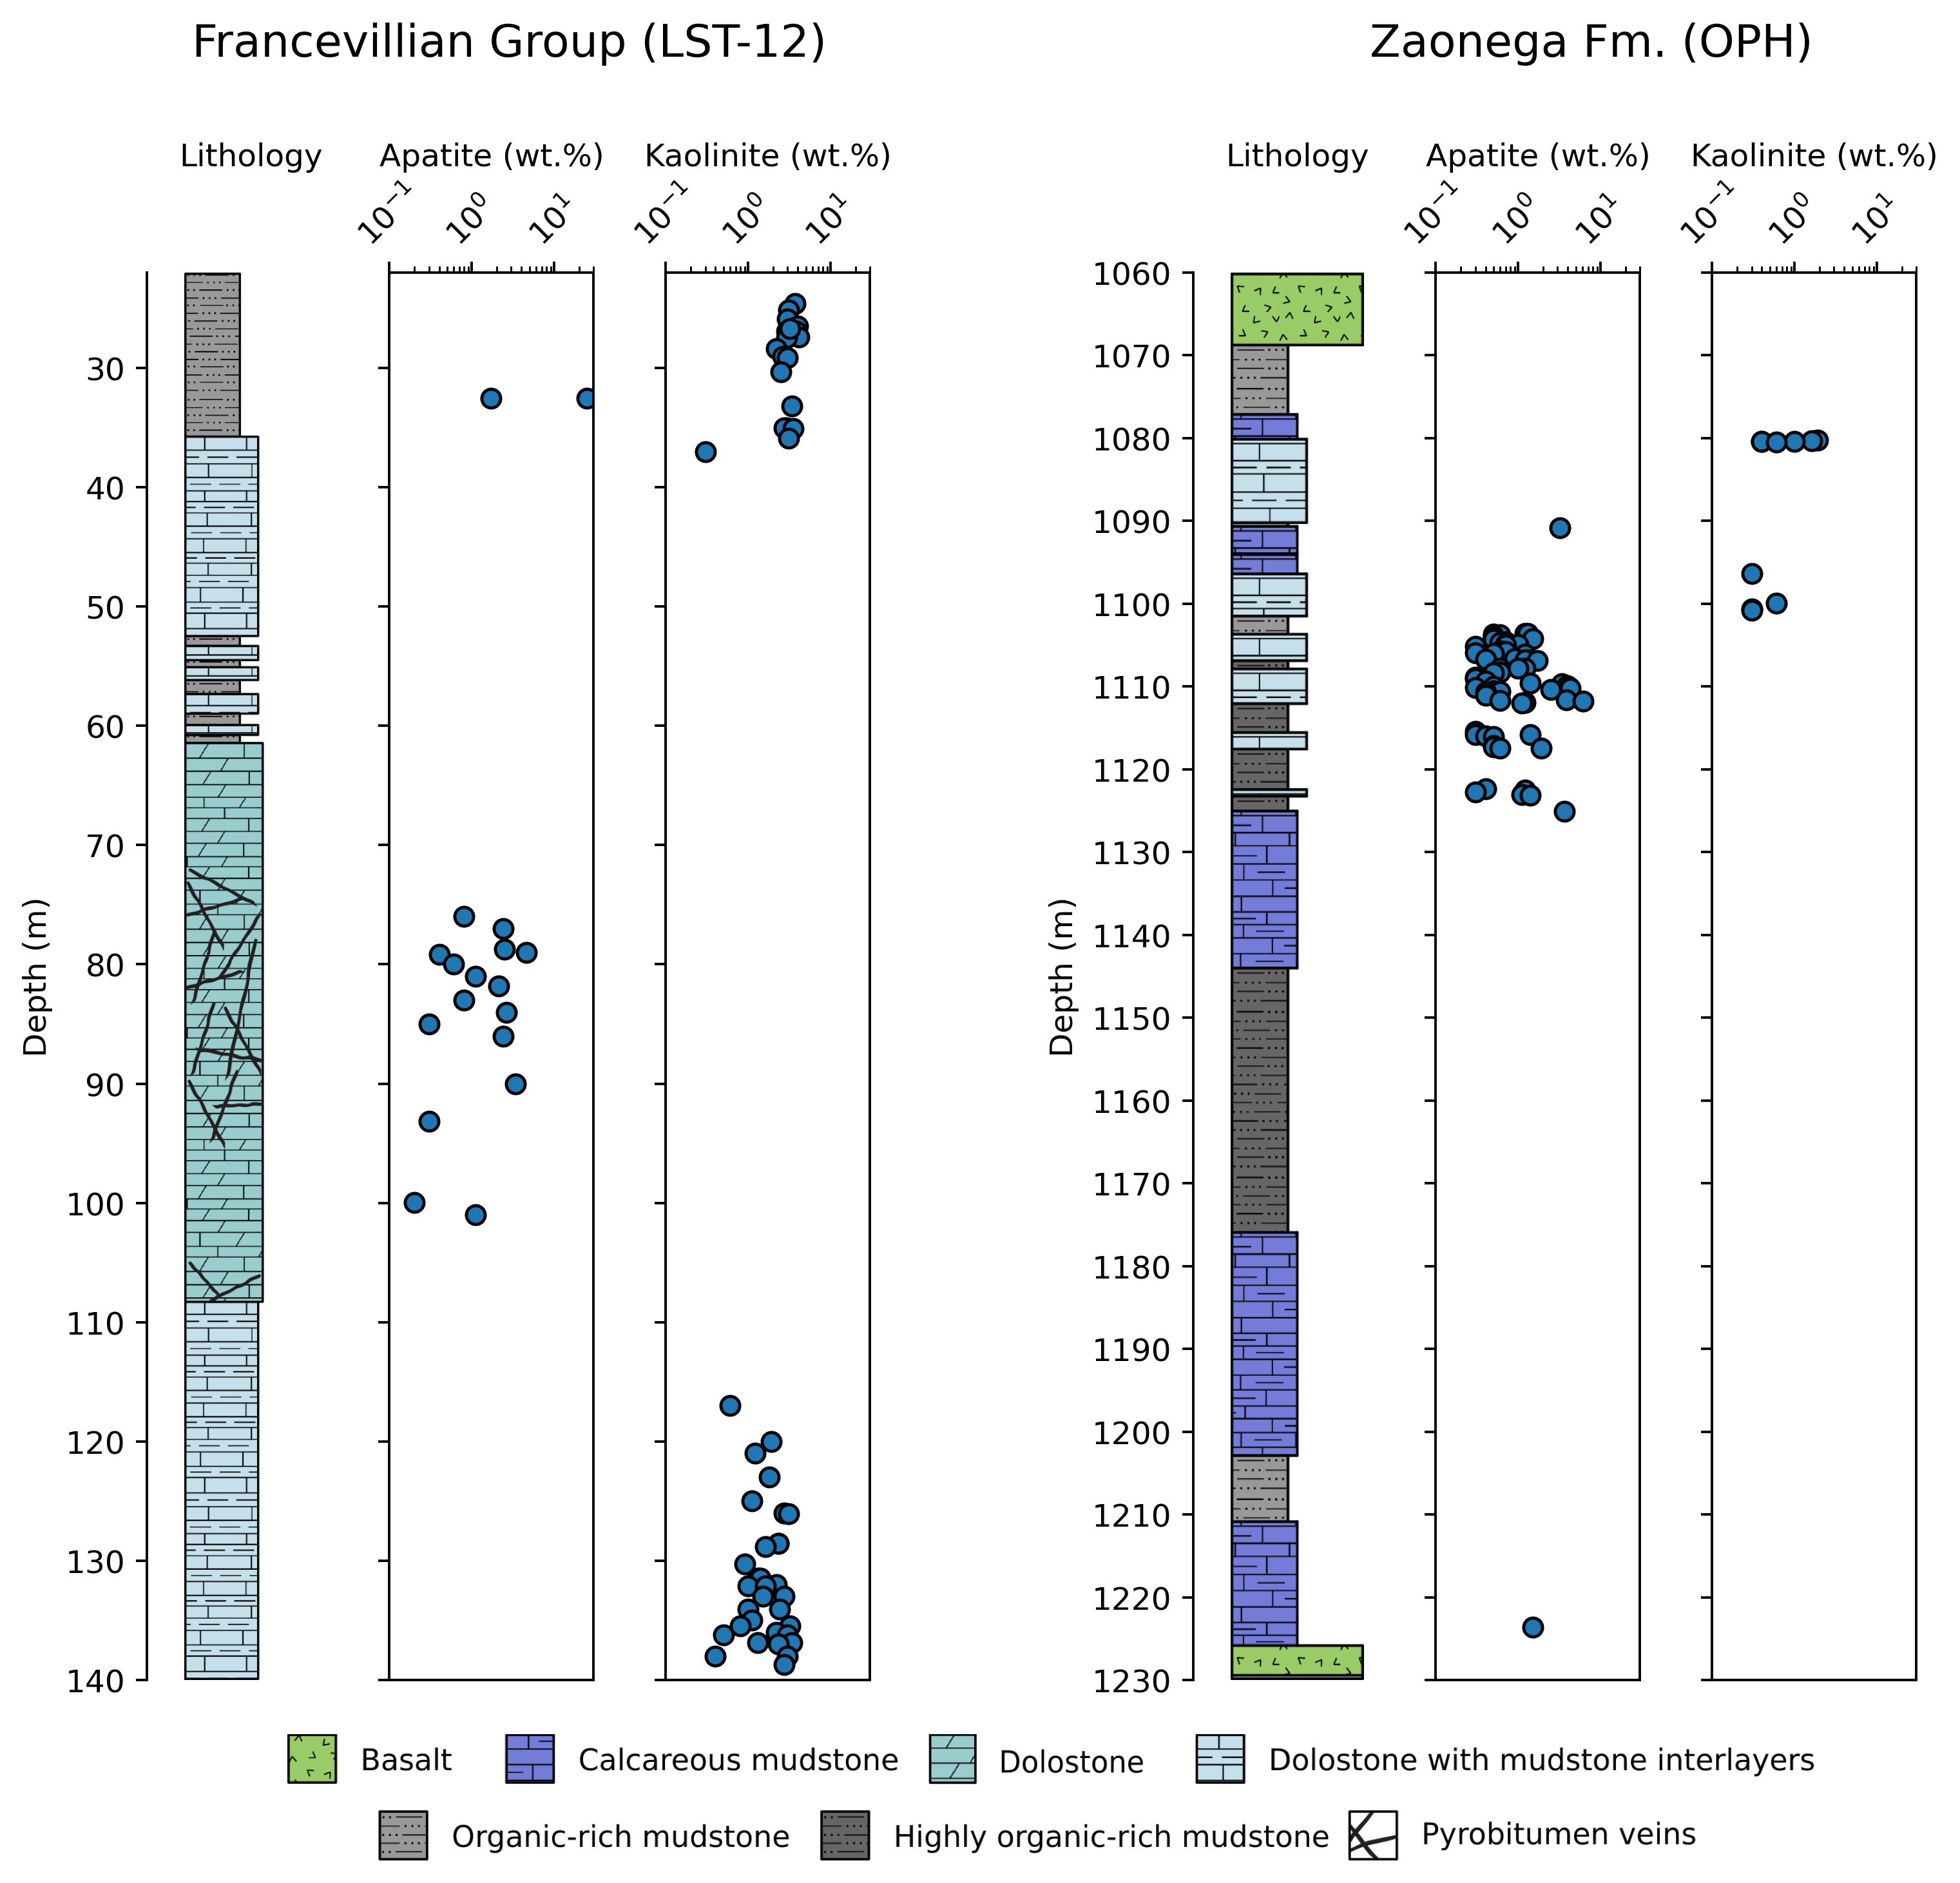

In [31]:
# Create canvas, panels
fig = plt.figure(figsize=(8, 8), dpi=350)
gs1 = GridSpec(1, 3, left=0.02, right=0.4, bottom=0.1, width_ratios=[1.3, 2, 2], wspace=0.4)
gs2 = GridSpec(1, 3, left=0.6, right=0.98, bottom=0.1, width_ratios=[1.3, 2, 2], wspace=0.4)
gs3 = GridSpec(1, 1, left=0, right=1, top=0.07, bottom=0)

fdaxes = [fig.add_subplot(gs1[0])]
fdaxes.append(fig.add_subplot(gs1[1], sharey=fdaxes[0]))
fdaxes.append(fig.add_subplot(gs1[2], sharey=fdaxes[0]))

ozaxes = [fig.add_subplot(gs2[0])]
ozaxes.append(fig.add_subplot(gs2[1], sharey=ozaxes[0]))
ozaxes.append(fig.add_subplot(gs2[2], sharey=ozaxes[0]))

legax = fig.add_subplot(gs3[0])

# Draw data in axes
fill_apfig(data=fd_data, columns=['Apatite', 'Kaolinite'], axlist=fdaxes,
           imfile='input_data/franceville_litho.png', top=22, bottom=140, lims=(0.1,30), lithoex=6)
fill_apfig(data=oph_data, columns=['Apatite', 'Kaolinite'], axlist=ozaxes,
           imfile='input_data/onega_litho.png', top=1060, bottom=1230, lims=(0.1,30))
fdaxes[0].set_xlim(0, 10)

# Legend TODO
legimg = mpimg.imread('input_data/litho_legend.png')
legax.imshow(legimg)
legax.axis('off')

# Format
fig.align_xlabels()
fig.text(0.2, 1, 'Francevillian Group (LST-12)', ha='center', fontsize='x-large')
fig.text(0.8, 1, 'Zaonega Fm. (OPH)', ha='center', fontsize='x-large')
fig.patch.set_facecolor('white')

In [32]:
# Make sure text is saved as text.
plt.rcParams['svg.fonttype'] = 'none'
fig.savefig('figures/Figure S1.png', bbox_inches='tight', dpi=350, transparent=False)